In [110]:
import pandas as pd

# Load the dataset with tab delimiter
file_path = '/content/marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')

In [112]:
print(data)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

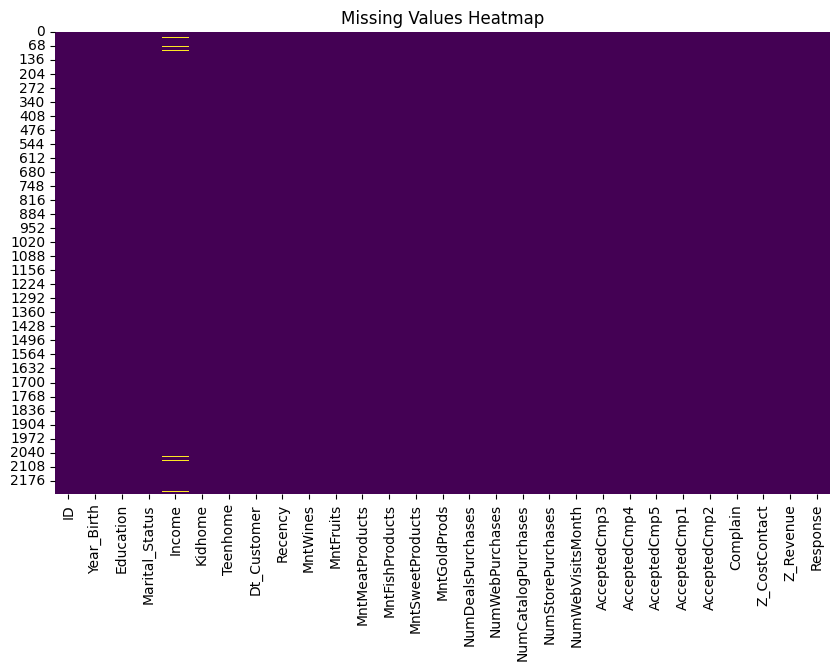

In [114]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [86]:
median_income = data['Income'].median()
data['Income'].fillna(median_income, inplace=True)

<ipython-input-86-252a1438c9fb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(median_income, inplace=True)


In [87]:
# Clean 'Dt_Customer' column
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
# Check for duplicates and drop them if present
data.drop_duplicates(inplace=True)

In [88]:
# Display a summary of the cleaned dataset
cleaned_info = {
    "missing_values": data.isnull().sum(),
    "duplicates": data.duplicated().sum(),
    "shape": data.shape
}

print("Data cleaning complete. Summary:")
print(cleaned_info)

Data cleaning complete. Summary:
{'missing_values': ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64, 'duplicates': np.int64(0), 'shape': (2240, 29)}


In [89]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

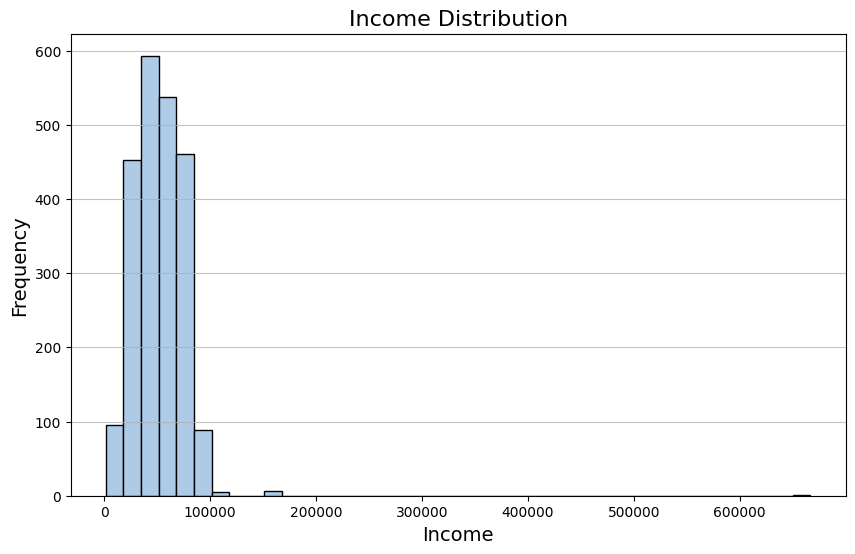

In [90]:
import matplotlib.pyplot as plt

# Create a histogram for the 'Income' column
plt.figure(figsize=(10, 6))
plt.hist(data['Income'], bins=40, color="#adcae6", edgecolor="black")
plt.title("Income Distribution", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.show()


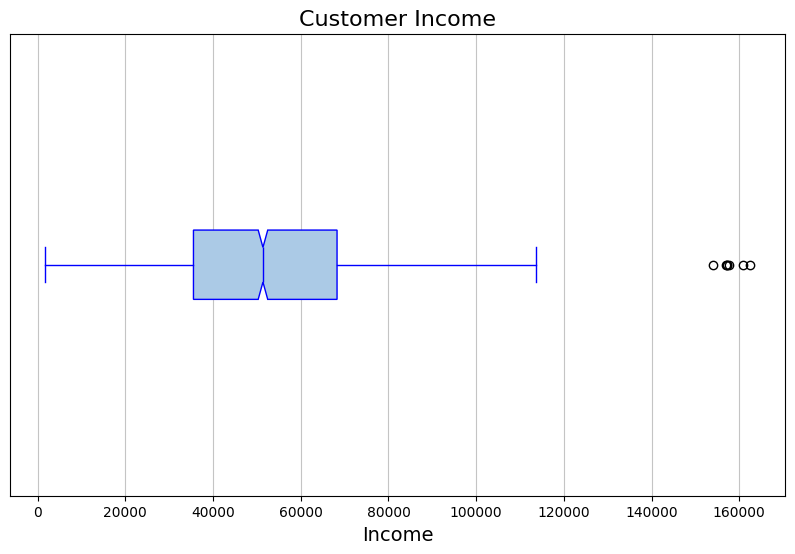

In [91]:

# Filter income values less than 180000
filtered_income = data['Income'][data['Income'] < 180000]

# Create a boxplot for the filtered income values
plt.figure(figsize=(10, 6))
plt.boxplot(
    filtered_income,
    vert=False,  # Horizontal boxplot
    patch_artist=True,  # Fill the box with color
    notch=True,  # Add a notch to indicate the median confidence interval
    boxprops=dict(facecolor="#abcae6", color="blue"),  # Box color
    medianprops=dict(color="blue"),  # Median line color
    whiskerprops=dict(color="blue"),  # Whisker line color
    capprops=dict(color="blue")  # Cap line color
)
plt.title("Customer Income", fontsize=16)
plt.xlabel("Income", fontsize=14)
plt.yticks([])  # Removes the y-axis ticks
plt.grid(axis='x', alpha=0.75)
plt.show()

<ipython-input-92-8a0a83ddd214>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  eduplot = sns.boxplot(


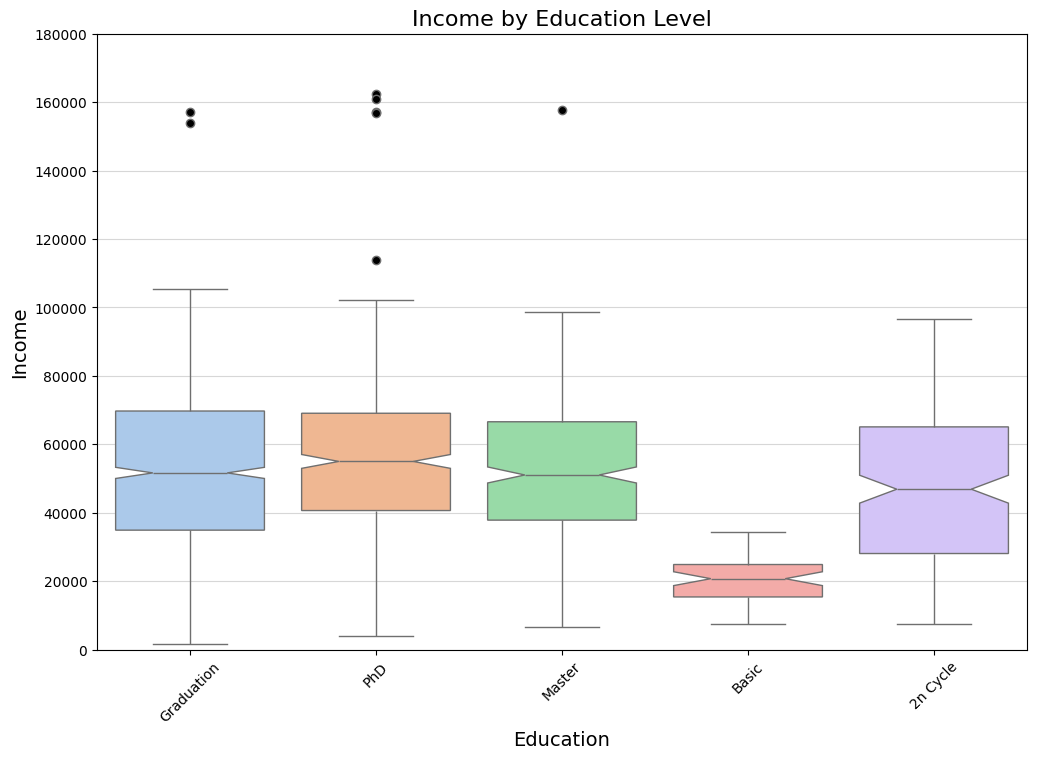

In [92]:
# Create a boxplot for Education vs Income
plt.figure(figsize=(12, 8))
eduplot = sns.boxplot(
    x='Education',
    y='Income',
    data=data,
    notch=True,
    palette="pastel",
    showfliers=True,  # Include outliers
    flierprops={"marker": "o", "markerfacecolor": "black", "markersize": 6}
)

# Set limits and titles
plt.ylim(0, 180000)
plt.title("Income by Education Level", fontsize=16)
plt.xlabel("Education", fontsize=14)
plt.ylabel("Income", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

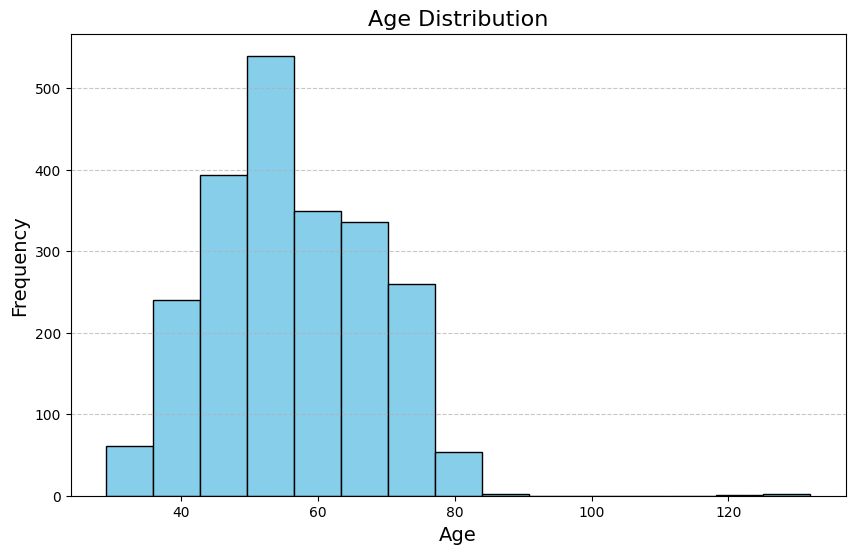

In [93]:

# Calculate ages from the Year_Birth column
current_year = 2025  # Assuming the current year is 2025
data['Age'] = current_year - data['Year_Birth']

# Plot the histogram of ages
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


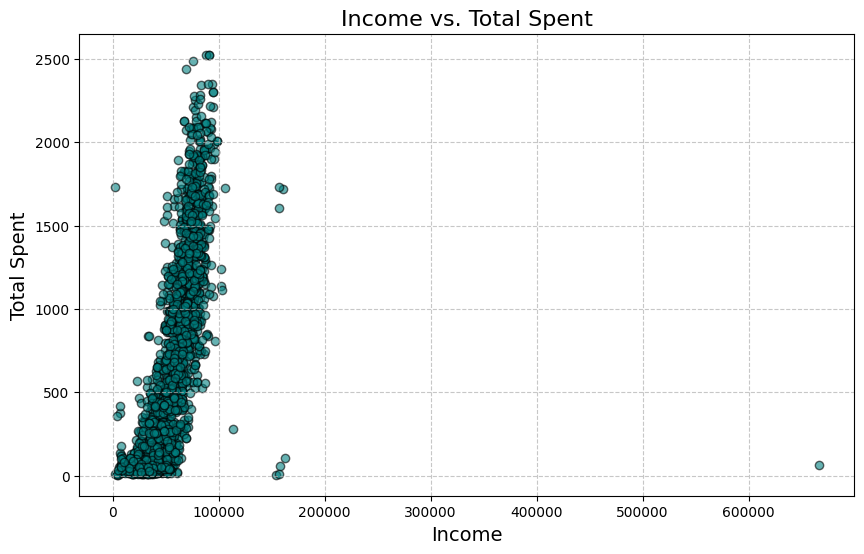

In [94]:
# Calculate total spending from relevant columns
spending_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]
data['Total_Spent'] = data[spending_columns].sum(axis=1)

# Plot the scatter plot of Income vs. Total Spent
plt.figure(figsize=(10, 6))
plt.scatter(data['Income'], data['Total_Spent'], alpha=0.6, color='teal', edgecolor='black')
plt.title('Income vs. Total Spent', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Total Spent', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.show()


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics
from sklearn.preprocessing import MinMaxScaler

In [96]:
data['Total_Spent'] = data[['MntWines', 'MntFruits', 'MntMeatProducts',
                                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)



In [97]:
features = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']
target = 'Response'  # Or your desired target column


In [98]:

# Splitting data into train and test sets using the original dataset
X = data[features]
y =data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf)) # Use precision_score
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Random Forest
Accuracy: 0.8660714285714286
Precision: 0.6551724137931034
Recall: 0.2753623188405797
F1 Score: 0.3877551020408163


In [100]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier # Import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV # Import GridSearchCV


In [101]:
gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb, {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}, cv=5, scoring='f1')
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_

y_pred_gb = gb_best.predict(X_test)
print("Gradient Boosting ")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

Gradient Boosting 
Accuracy: 0.8616071428571429
Precision: 0.6521739130434783
Recall: 0.21739130434782608
F1 Score: 0.32608695652173914


In [102]:
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

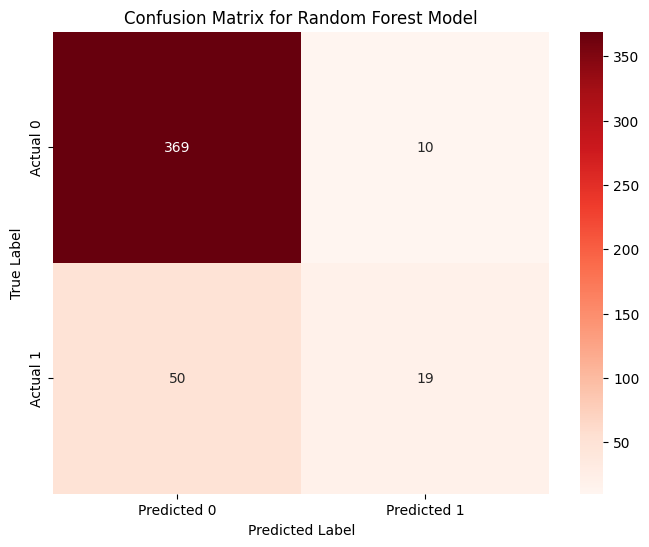

In [103]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)  # Changed y_pred to y_pred_rf

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define features and target
features = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']
target = 'Response'

# Drop rows with missing values in relevant columns
data = data.dropna(subset=features + [target])

# Extract features and target
X = data[features]
y = data[target]

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for LSTM: (samples, time steps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Build LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# Train the model and store the training history
history = lstm_model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Predictions
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype(int).flatten()
lstm_accuracy = accuracy_score(y_test_lstm, y_pred_lstm)
print(f" LSTM Accuracy: {lstm_accuracy:.2f}")

Epoch 1/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8660 - loss: 0.3352 - val_accuracy: 0.8556 - val_loss: 0.3340
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8616 - loss: 0.3408 - val_accuracy: 0.8611 - val_loss: 0.3318
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8566 - loss: 0.3408 - val_accuracy: 0.8556 - val_loss: 0.3309
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8578 - loss: 0.3206 - val_accuracy: 0.8556 - val_loss: 0.3311
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8650 - loss: 0.3300 - val_accuracy: 0.8556 - val_loss: 0.3320
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8801 - loss: 0.2914 - val_accuracy: 0.8556 - val_loss: 0.3291
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8649 - loss: 0.3328 - val_accuracy: 0.8556 - val_loss: 0.3281
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8827 - loss: 0.2893 - val_accuracy: 0.8611 - val_loss

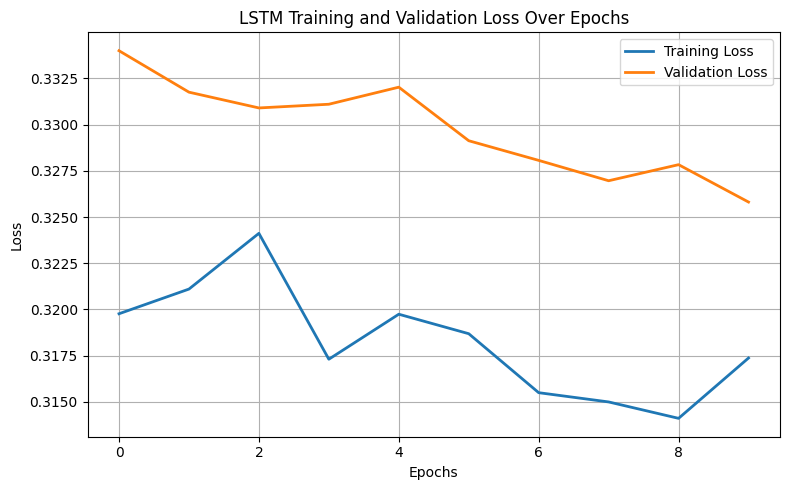

In [57]:
# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('LSTM Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:
# Show model summary
lstm_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        20,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,781 (264.77 KB)

 Trainable params: 22,593 (88.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,188 (176.52 KB)

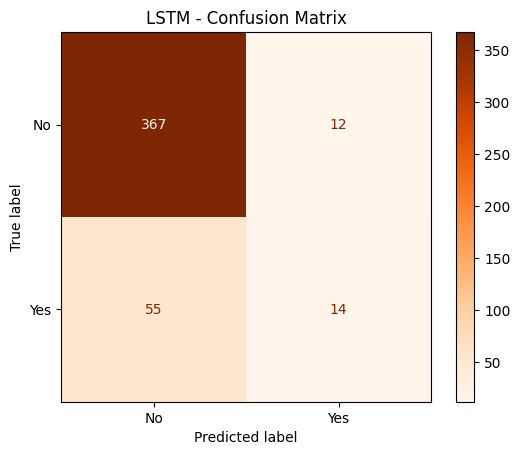

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_lstm = confusion_matrix(y_test_lstm, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm, display_labels=["No", "Yes"])
disp_lstm.plot(cmap='Oranges')
plt.title("LSTM - Confusion Matrix")
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


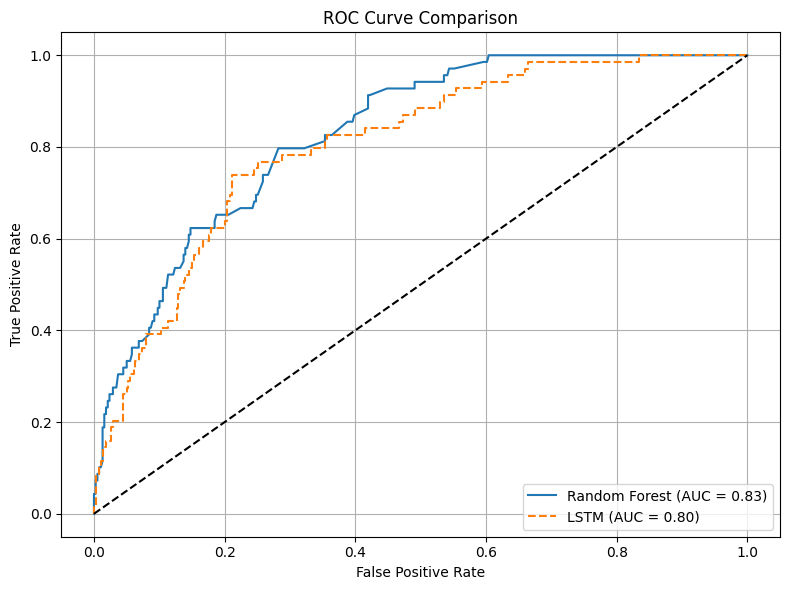

In [60]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_score_rf = rf_model.predict_proba(X_test_rf)[:, 1]
y_score_lstm = lstm_model.predict(X_test_lstm).flatten()

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test_rf, y_score_rf)
fpr_lstm, tpr_lstm, _ = roc_curve(y_test_lstm, y_score_lstm)

roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_lstm, tpr_lstm, label=f"LSTM (AUC = {roc_auc_lstm:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

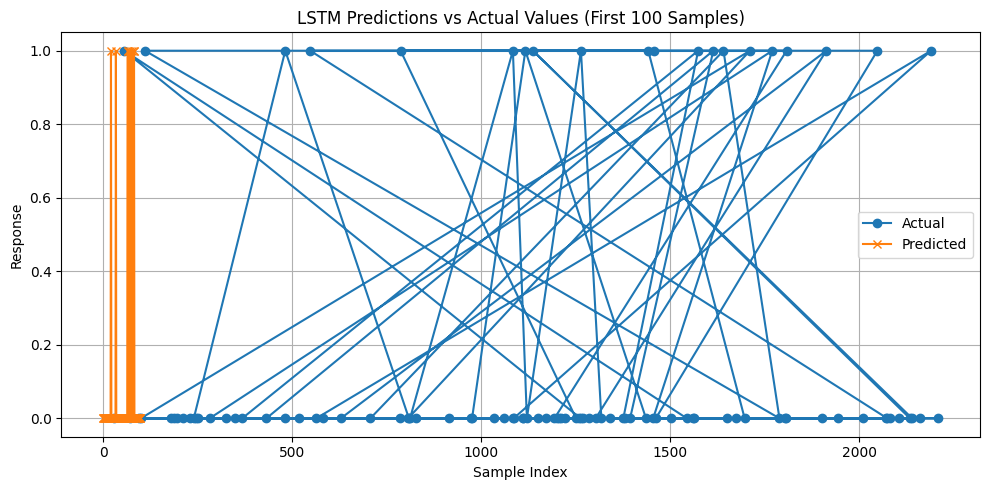

In [61]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test_lstm[:100], label='Actual', marker='o')
plt.plot(y_pred_lstm[:100], label='Predicted', marker='x')
plt.title('LSTM Predictions vs Actual Values (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


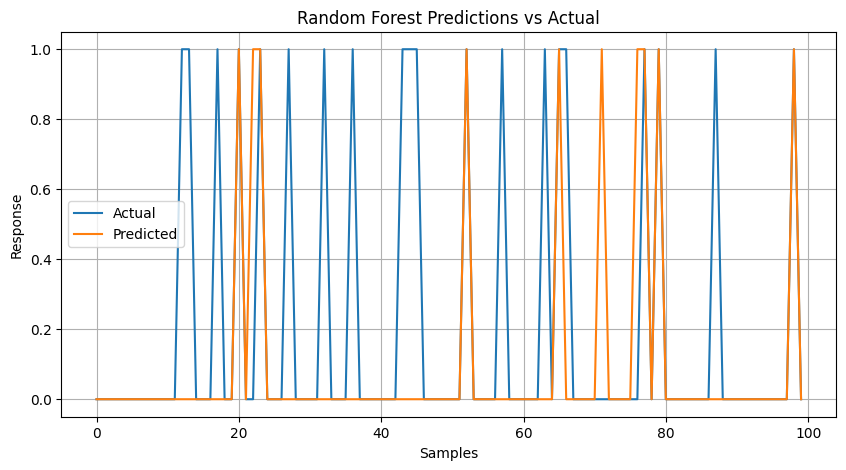

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_rf[:100].values, label='Actual')
plt.plot(y_pred_rf[:100], label='Predicted')
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Samples')
plt.ylabel('Response')
plt.legend()
plt.grid(True)
plt.show()


In [117]:
#Initiating PCA to reduce dimentions aka features to 3
from sklearn.decomposition import PCA # Import PCA class from sklearn.decomposition
from sklearn.preprocessing import MinMaxScaler # Import the MinMaxScaler

# Assuming 'data' is your DataFrame with the features
# Replace 'features' with the actual list of feature columns if needed
features = ['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth']
X = data[features]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_ds = scaler.fit_transform(X) # Now 'scaled_ds' is defined

pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2240.0,2.141144e-17,0.443689,-1.218818,-0.395586,0.076763,0.434236,0.795446
col2,2240.0,6.264830e-17,0.295698,-0.641994,-0.242551,-0.017637,0.228344,0.909059
col3,2240.0,1.704985e-17,0.291649,-0.849569,-0.211440,-0.003141,0.226235,0.618862


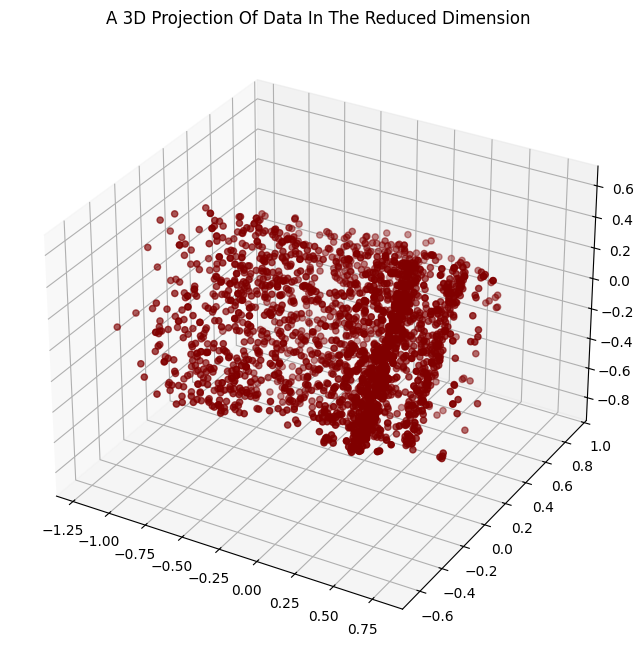

In [118]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()